In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/HousingData.csv")

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
#imputing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X)
X = imputer.transform(X)

In [10]:
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [11]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[-0.39100929 -0.47170403  0.08455315 ...  1.17922586  0.43131075
  -0.51059011]
 [-0.38097523 -0.47170403 -1.06887345 ... -0.87818892  0.43131075
   0.26718562]
 [-0.39145183  0.60955778 -0.95031057 ...  0.24403732  0.43131075
  -1.03603931]
 ...
 [ 0.23183385 -0.47170403  0.98768033 ...  0.80515044  0.43131075
   0.91602526]
 [-0.36052549 -0.47170403 -0.75416949 ... -0.5041135   0.20612959
  -0.2610364 ]
 [-0.38728193 -0.47170403 -0.78929924 ...  0.33755618  0.43131075
  -0.5535688 ]]


In [13]:
print(X_test)

[[-0.39057638  0.95556156 -1.34259271 ... -0.03651924  0.43131075
  -0.72548358]
 [-0.39313005  1.90707195 -1.10839442 ... -0.41059465  0.43131075
  -0.77400791]
 [-0.37134095 -0.47170403  0.98768033 ... -0.27031637  0.38482174
   0.83699992]
 ...
 [-0.39125515  1.79894577 -0.88297856 ... -0.87818892  0.14991811
  -0.4509745 ]
 [-0.37028805 -0.47170403 -0.24332446 ...  0.33755618  0.43131075
   0.02179114]
 [-0.38701363 -0.47170403  0.37583729 ... -1.15874548  0.43131075
  -0.57991058]]


In [14]:
print(y_train)

[20.6 23.1 28.  20.  23.1 25.   9.7 23.9 36.1 13.4 12.7 39.8 10.4 20.6
 17.8 19.5 23.7 28.5 24.3 23.8 19.1 28.4 20.5 33.8 14.5 20.4 16.  13.3
 30.8 27.5 24.4 24.4 25.1 43.8 21.9 26.2 14.2 20.8 20.1 23.1 13.1 16.2
 24.8 20.2 22.5 14.8 28.7 20.1 23.4 32.  19.1 50.  20.9 21.7 22.  17.2
 30.3 12.3 21.4 20.5 35.2 19.6 22.  21.7 14.1 21.1 15.  11.9 20.  41.3
 18.7 50.  50.  18.4 17.9 28.1 16.1 17.2 28.6 23.6 20.4 19.6 18.8 22.6
 17.7 30.5 18.2 20.6 24.4 17.3 13.3 22.8 20.5 21.2 18.8 18.9 18.2 23.1
 32.7 24.  10.2 19.5 33.1 13.4 15.2 24.8 24.3  9.5 24.2 18.5 44.  50.
 24.7 21.5  8.4 21.8 50.  23.8 32.4 24.4 17.6 29.8  9.6 16.7 13.8 32.
 16.1  8.3 26.6 14.3 15.  28.4 32.2 17.1 29.4 10.4 16.8 31.5 27.5 46.7
 27.5 17.2 23.4 31.6 13.8 22.  17.  24.8 24.3 25.2 21.2 20.6 18.7  5.6
 19.3 19.8 22.3 20.3 12.  23.9 16.5 13.2 33.2 10.5  7.5 27.5 18.4 23.2
 13.8 35.4 23.  25.   7.2 14.4  8.8 22.7 13.1 18.9 25.   8.5 16.1 29.
 23.1 19.3 33.1 24.6 23.  15.2 27.1 19.6 24.5 20.3 34.9 17.1 15.6 26.4
 22.6 15.

In [15]:
print(y_test)

[28.2 23.9 16.6 22.  20.8 23.  27.9 14.5 21.5 22.6 23.7 31.2 19.3 19.4
 19.4 27.9 13.9 50.  24.1 14.6 16.2 15.6 23.8 25.  23.5  8.3 13.5 17.5
 43.1 11.5 24.1 18.5 50.  12.6 19.8 24.5 14.9 36.2 11.9 19.1 22.6 20.7
 30.1 13.3 14.6  8.4 50.  12.7 25.  18.6 29.8 22.2 28.7 23.8  8.1 22.2
  6.3 22.1 17.5 48.3 16.7 26.6  8.5 14.5 23.7 37.2 41.7 16.5 21.7 22.7
 23.  10.5 21.9 21.  20.4 21.8 50.  22.  23.3 37.3 18.  19.2 34.9 13.4
 22.9 22.5 13.  24.6 18.3 18.1 23.9 50.  13.6 22.9 10.9 18.9 22.4 22.9
 44.8 21.7 10.2 15.4 25.3 23.3  7.2 21.2 11.7 27.  29.6 26.5 43.5 23.6
 11.  33.4 36.  36.4 19.  20.2 34.9 50.  19.3 14.9 26.6 19.9 24.8 21.2
 23.9]


In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.7713966469961513

In [20]:
mean_squared_error(y_test, y_pred)

22.64509919856119

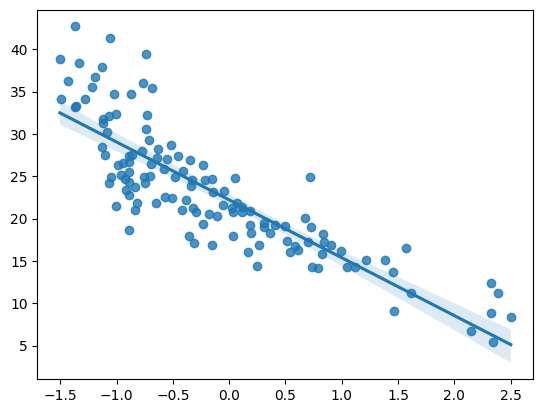

In [21]:
import seaborn as sns
sns.regplot(x=X_test[:,-1],y=y_pred)
plt.show()

<Axes: >

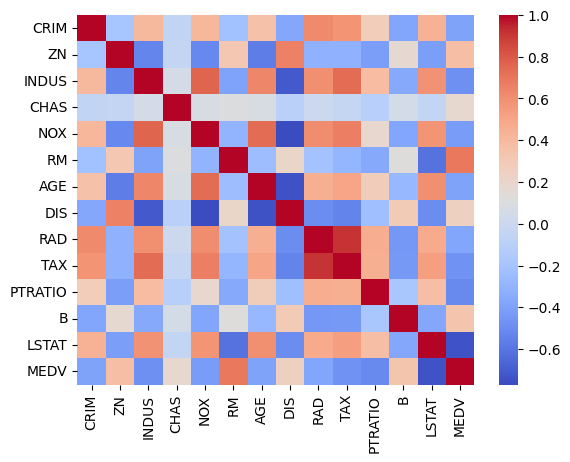

In [22]:
v=df.corr()
sns.heatmap(v, annot = False, cmap="coolwarm")